### 1 Data preprocessing

### a. Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


### 2. Exploratory Data Analysis(EDA)

### a. Understand the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


### b. handle missing values

In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

### c. Outliers Detection

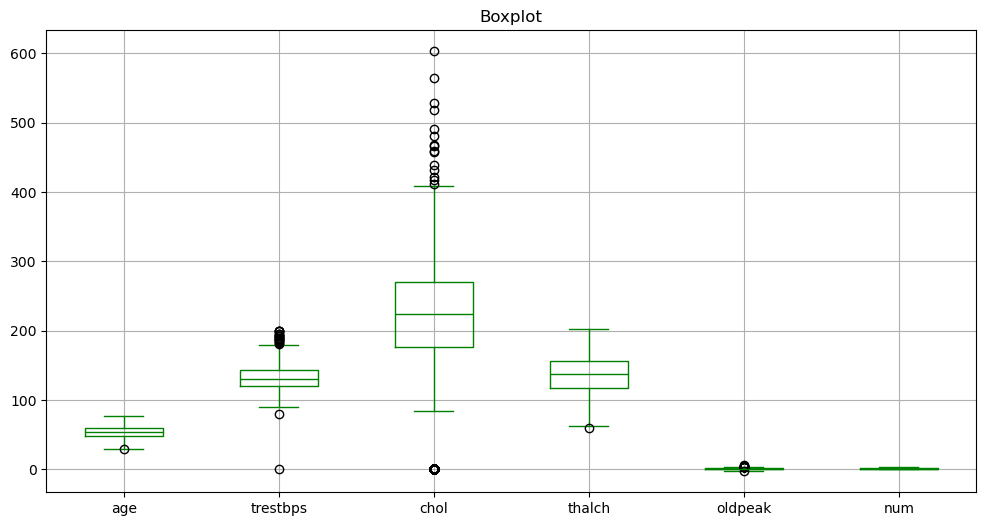

In [6]:
# Boxplot
df.select_dtypes(include='number').boxplot(figsize=(12,6), color='green')
plt.title("Boxplot")
plt.show()

### d. Inconsistencies

In [7]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in cat_cols:
    print(f"{col} unique values:\n", df[col].value_counts(dropna=False), "\n")

sex unique values:
 sex
Male      718
Female    190
Name: count, dtype: int64 

cp unique values:
 cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64 

fbs unique values:
 fbs
False    723
True     185
Name: count, dtype: int64 

restecg unique values:
 restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64 

exang unique values:
 exang
FALSE    535
TRUE     337
TURE      36
Name: count, dtype: int64 

slope unique values:
 slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64 

thal unique values:
 thal
normal               369
reversable defect    343
fixed defect         196
Name: count, dtype: int64 



### e. Visualize Feature Distributions

### Histogram

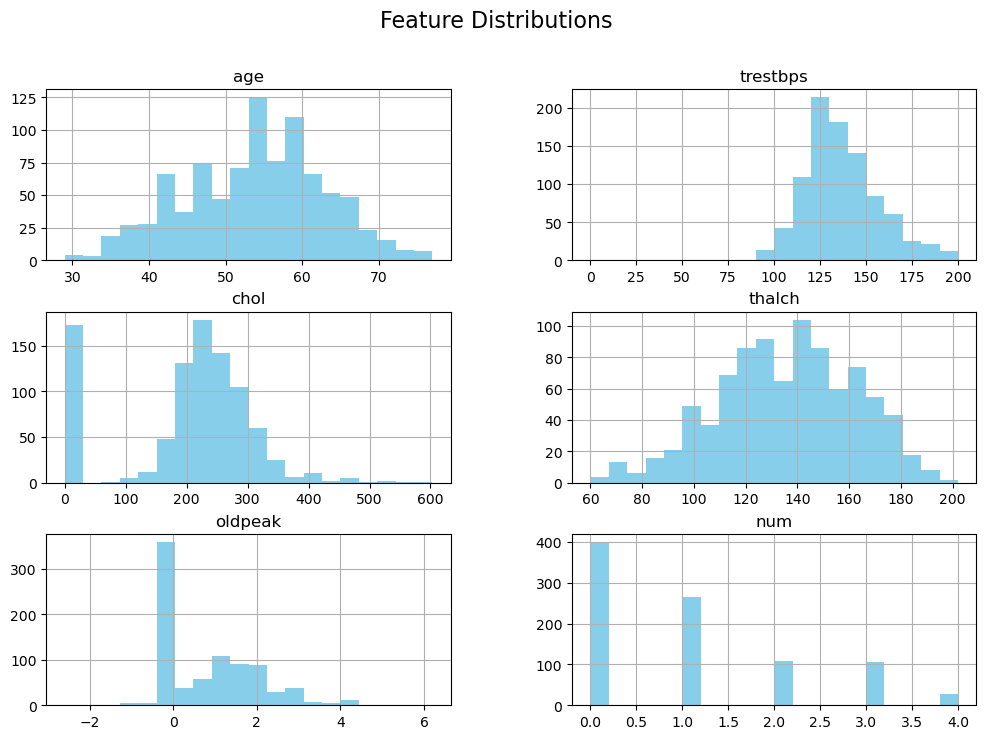

In [8]:
df.hist(figsize=(12,8), bins=20, color='skyblue')
plt.suptitle("Feature Distributions", size=16)
plt.show()

### Boxplot

In [9]:
import seaborn as sns

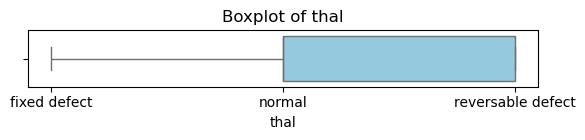

In [10]:
plt.figure(figsize=(6, 1.5))
sns.boxplot(x=df[col], color='skyblue')
plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### f. Correlation Matrix

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

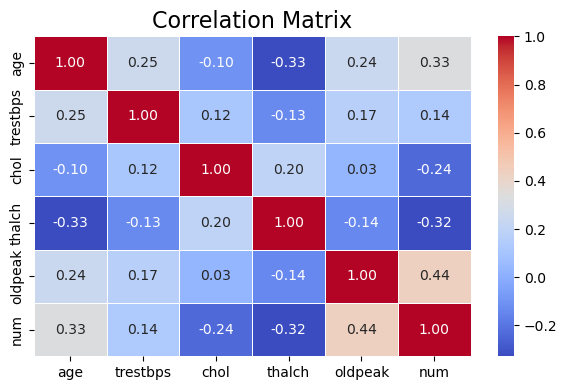

In [12]:
corr = df[num_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

### 3. Feature Engineering

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [14]:
# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Handle missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# Separate features and target
X = df.drop('num', axis=1)  # 'num' is the target column
y = df['num']

In [15]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Decision Tree Classification

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

### a. Split the Dataset

In [18]:
X= df.drop('num',axis=1)
y =df['num']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### b. Train Decision Model

In [20]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
y_pred = dt.predict(X_test)

### c. Evaluate the model

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1-score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.510989010989011
Precision: 0.30001931075460486
Recall: 0.3017171884075387
F1-score: 0.30086350690606356

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        89
           1       0.35      0.35      0.35        48
           2       0.27      0.27      0.27        22
           3       0.12      0.12      0.12        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.30      0.30      0.30       182
weighted avg       0.51      0.51      0.51       182



### 5. Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1)

grid.fit(X_train, y_train)

best_dt = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


### 6. Model evaluation and analysis

In [26]:
from sklearn.tree import plot_tree

In [27]:
y_pred_best = best_dt.predict(X_test)

### a. Analyse the performance

In [28]:
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Precision:", precision_score(y_test, y_pred_best, average='macro', zero_division=0))
print("Tuned Recall:", recall_score(y_test, y_pred_best, average='macro', zero_division=0))
print("Tuned F1-score:", f1_score(y_test, y_pred_best, average='macro', zero_division=0))
print("\nTuned Classification Report:\n", classification_report(y_test, y_pred_best))

Tuned Accuracy: 0.5714285714285714
Tuned Precision: 0.26987562363853557
Tuned Recall: 0.31784534038334433
Tuned F1-score: 0.2918541775684633

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.85      0.78        89
           1       0.43      0.50      0.46        48
           2       0.00      0.00      0.00        22
           3       0.21      0.24      0.22        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.27      0.32      0.29       182
weighted avg       0.48      0.57      0.52       182



C:\Users\user\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\user\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\user\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### b. Visualize the decision tree

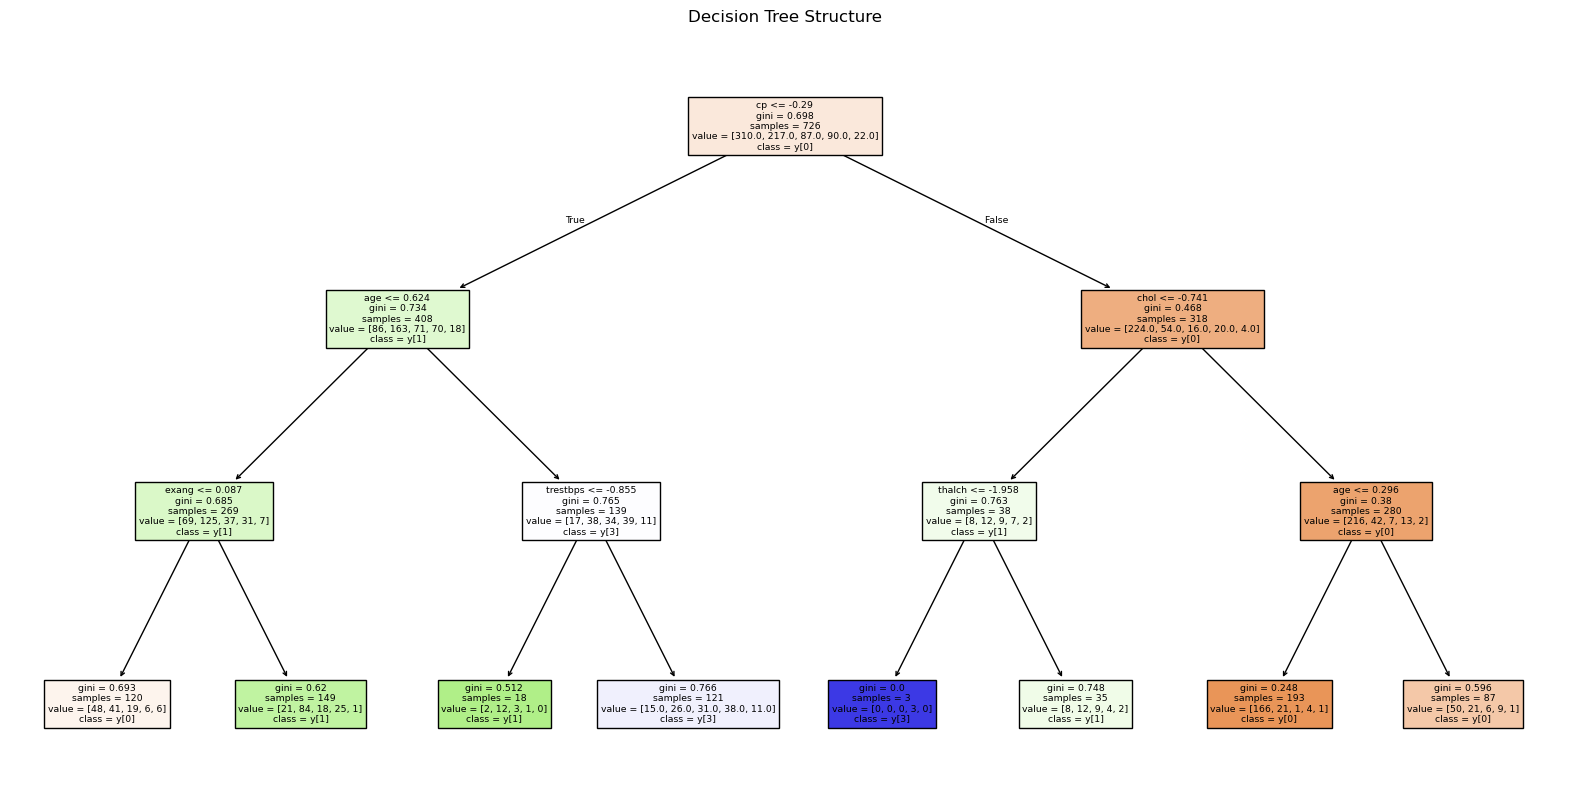

In [29]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree Structure")
plt.show()

In [30]:
importances = pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False)

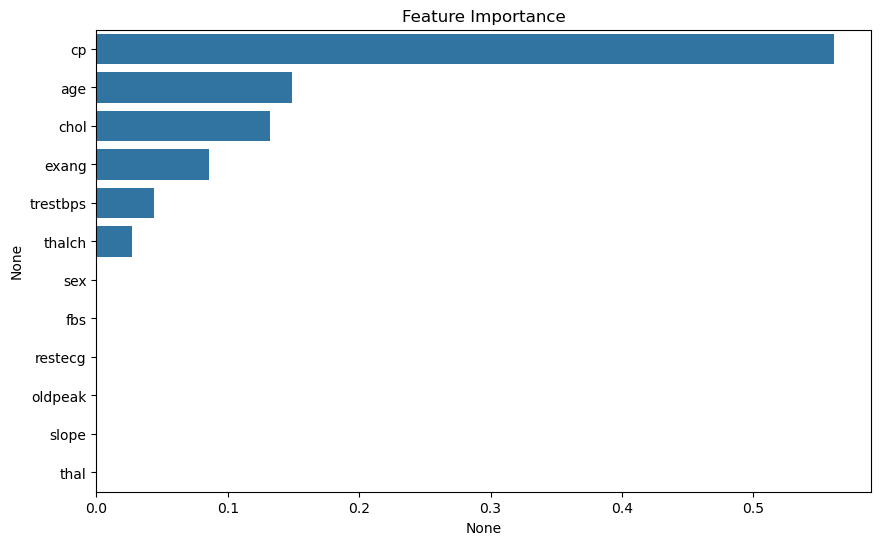

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.show()

### Interview questions

### 1.What are some common hyperparameters of Decision Tree models, and how do they affect the model’s performance?

 Decision Tree models have several key hyperparameters that control their complexity, generalization, and interpretability. Some of the most common ones are:

Hyperparameter	Description	Effect on Performance
max_depth	Maximum depth (levels) of the tree.	Limits how deep the tree can grow. A smaller value reduces overfitting (simpler model), while a larger value allows the model to capture more patterns but may overfit.
min_samples_split	Minimum number of samples required to split a node.	Higher values make the model more conservative (less splits → less overfitting). Smaller values allow more splits → may lead to overfitting.
min_samples_leaf	Minimum samples required in a leaf node.	Prevents very small leaf nodes. Larger values smooth the model and reduce overfitting.
max_features	Number of features to consider when finding the best split.	Reducing features at each split introduces randomness (useful in ensembles) and prevents overfitting.
criterion	Function used to measure split quality, e.g., "gini" or "entropy".	Affects how splits are chosen. "gini" is faster; "entropy" provides a more information-theoretic approach.
max_leaf_nodes	Maximum number of terminal nodes (leaves).	Controls model complexity; fewer leaf nodes reduce overfitting.


Summary:

Too few splits (high constraints) → underfitting (model too simple).

Too many splits (no constraints) → overfitting (model memorizes training data).

Hyperparameter tuning helps find the right balance between bias and variance

### 2.What is the difference between Label Encoding and One-Hot Encoding?

Aspect	Label Encoding	One-Hot Encoding
Definition	Converts each categorical value into a unique integer label.	Converts each category into a separate binary column (0 or 1).
Example	Color = {Red, Green, Blue} → Red=0, Green=1, Blue=2	Color → Red=[1,0,0], Green=[0,1,0], Blue=[0,0,1]
Output Type	Single column with integer values.	Multiple columns (one per category).
When to Use	Useful for ordinal data (where order matters, e.g., "Low", "Medium", "High").	Used for nominal data (no inherent order, e.g., "Red", "Blue", "Green").
Disadvantage	May mislead models that interpret numerical order as magnitude (e.g., 2 > 1).	Increases dimensionality (more columns), but avoids false ordering.


Summary:

Use Label Encoding for ordinal categorical features.

Use One-Hot Encoding for nominal categorical features to avoid introducing false numeric relationships.

In [ ]:
print("hello")